In [64]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from subprocess import check_call
from graphviz import Source
from sklearn import tree
from IPython.display import SVG
from os import system

import random
import matplotlib.pyplot as plt

In [65]:
trainData = pd.read_csv("P1_data/trainX.csv", header=None)
trainLabel = pd.read_csv("P1_data/trainY.csv", header=None)
testData = pd.read_csv("P1_data/testX.csv", header=None)
testLabel = pd.read_csv("P1_data/testY.csv", header=None)

trainData = trainData.values
trainLabel = trainLabel.values
testData = testData.values
testLabel = testLabel.values


In [66]:
model = tree.DecisionTreeClassifier(criterion = "entropy")
model.fit(trainData, trainLabel)
y_predict = model.predict(testData)
print("Accuracy = ", accuracy_score(testLabel, y_predict))

Accuracy =  0.9473684210526315


In [67]:
classi = pd.DataFrame(
    confusion_matrix(testLabel, y_predict),
    columns=['Predicted Benign', 'Predicted Malignant'],
    index=['True Benign', 'True Malignant']
)
print(classi)

                Predicted Benign  Predicted Malignant
True Benign                   32                    0
True Malignant                 3                   22


In [68]:
print("Misclassification rate for Malignant= ", classi.iloc[1,0]/(classi.iloc[1,0] + classi.iloc[1,1]))
print("Misclassification rate for Benign= ", classi.iloc[0,1]/(classi.iloc[0,1] + classi.iloc[0,0]))

Misclassification rate for Malignant=  0.12
Misclassification rate for Benign=  0.0


In [69]:
dotfile = open("tree.dot", 'w')
tree.export_graphviz(model, out_file = 'tree.dot')
dotfile.close()
system("dot tree.dot -Tpng -o tree.png")

# use http://www.webgraphviz.com/ to display the generated decision tree (tree.dot).

32512

For  10 % of the sample set: 

Accuracy =  0.8070175438596491




For  20 % of the sample set: 

Accuracy =  0.8947368421052632




For  30 % of the sample set: 

Accuracy =  0.9122807017543859




For  40 % of the sample set: 

Accuracy =  0.9122807017543859




For  50 % of the sample set: 

Accuracy =  0.8245614035087719




For  60 % of the sample set: 

Accuracy =  0.8596491228070176




For  70 % of the sample set: 

Accuracy =  0.8771929824561403




For  80 % of the sample set: 

Accuracy =  0.8771929824561403




For  90 % of the sample set: 

Accuracy =  0.8596491228070176






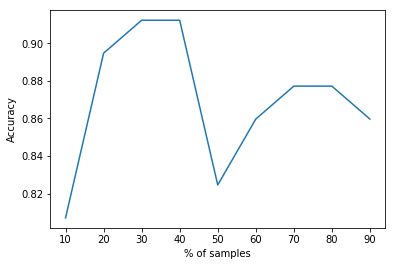

In [70]:
accuracy = []
for i in range(1,10):
    print("For ", i*10, "% of the sample set: \n")
    indexes = []
    values = []
    tesD = []
    trainD = random.sample(list(enumerate(trainData)), int(((i/10)*trainData.size)/30))
    for idx, val in trainD:
        indexes.append(idx)
        values.append(val)
    for j in range(0,len(indexes)):
        tesD.append(trainLabel[indexes[j]]);
        
    tesD = [int(i) for i in tesD]
    model = tree.DecisionTreeClassifier(criterion = "entropy")
    model.fit(values, tesD)
    y_predict = model.predict(testData)
    accuracy.append(accuracy_score(testLabel, y_predict))
    print("Accuracy = ", accuracy[i-1])
    print("\n\n\n")

i = list(range(10,100,10))
plt.plot(i, accuracy)
plt.xlabel('% of samples')
plt.ylabel('Accuracy')
plt.show()